In [1]:
import os
from os import path as op
import sys

home = os.getenv("USERPROFILE") if sys.platform=='win32' else os.getenv("HOME")

if not op.abspath("..") in sys.path:
    sys.path.insert(0, op.abspath(".."))

In [17]:
from collections import OrderedDict

import matplotlib.pyplot as plt
import numpy as np
import scipy.signal
import scipy.spatial
import pandas as pd

import cluster
import session

In [8]:
%matplotlib notebook

In [3]:
session_data, dc_percentile = session.load_jrc(r"F:\rhodeltapartdeux\forAlan")
features = session.load_jrc_features(r"F:\rhodeltapartdeux\forAlan")

In [4]:
session_data.head(10)

timestep  primary_site  secondary_site   jrc_rho  jrc_delta  \
0        16           121             123  0.001676   0.784327   
1       104           111             115  0.028293   0.544468   
2       117            97              99  0.007218   0.687091   
3       161            81              79  0.000872   0.728134   
4       188           182             179  0.042553   0.719041   
5       212           114             116  0.154658   0.392949   
6       225           143             147  0.000981   0.798517   
7       233           153             149  0.017081   0.617658   
8       288            81              79  0.005451   0.521838   
9       405            81              79  0.001265   0.683555   

   jrc_nearest_neighbor  auto_cluster  
0                116781           217  
1                317459           202  
2                 75377           170  
3                 67846           142  
4                238946           299  
5                292073           205  
6                392853           257  
7                166055           263  
8                 22029           142  
9                 64215           142

In [5]:
subset = None
table = cluster.rho_delta_all(features, session_data, subset)

Computing rho for site 121 (1/187)...done!
Computing rho for site 111 (2/187)...done!
Computing rho for site 97 (3/187)...done!
Computing rho for site 81 (4/187)...done!
Computing rho for site 182 (5/187)...done!
Computing rho for site 114 (6/187)...done!
Computing rho for site 143 (7/187)...done!
Computing rho for site 153 (8/187)...done!
Computing rho for site 100 (9/187)...done!
Computing rho for site 155 (10/187)...done!
Computing rho for site 79 (11/187)...done!
Computing rho for site 91 (12/187)...done!
Computing rho for site 69 (13/187)...done!
Computing rho for site 88 (14/187)...done!
Computing rho for site 107 (15/187)...done!
Computing rho for site 80 (16/187)...done!
Computing rho for site 106 (17/187)...done!
Computing rho for site 115 (18/187)...done!
Computing rho for site 99 (19/187)...done!
Computing rho for site 76 (20/187)...done!
Computing rho for site 144 (21/187)...done!
Computing rho for site 86 (22/187)...done!
Computing rho for site 64 (23/187)...done!
Computin

Computing delta for site 169 (179/187)...done!
Computing delta for site 4 (180/187)...done!
Computing delta for site 176 (181/187)...done!
Computing delta for site 173 (182/187)...done!
Computing delta for site 132 (183/187)...done!
Computing delta for site 174 (184/187)...done!
Computing delta for site 93 (185/187)...done!
Computing delta for site 171 (186/187)...done!
Computing delta for site 149 (187/187)...done!


In [62]:
r, d = cluster.cluster_centers(table, rho_cutoff=-3., delta_cutoff=0.75, detrend=True,
                               detrend_global=True, quadratic=True)

<IPython.core.display.Javascript object>


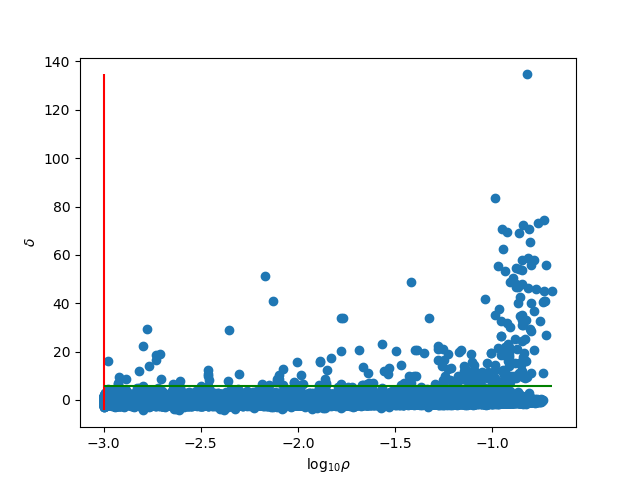

Text(0,0.5,'$\\delta$')

In [63]:
plt.figure()

plt.scatter(r, d)

plt.vlines(-3., ymin=d.min(), ymax=d.max(), colors='r')
plt.hlines(10**0.75, xmin=r.min(), xmax=r.max(), colors='g')

plt.xlabel(r"$\log_{10}{\rho}$")
plt.ylabel(r"$\delta$")

In [93]:
cluster.assign_clusters(table, 10000)

In [94]:
table.to_csv(r"F:\rhodeltapartdeux\forAlan\cluster_results.csv", index=False)